In [7]:
import os
# Disable oneDNN custom operations to prevent the TensorFlow warning about floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.models import load_model
from stacked_mnist_tf import DataMode, StackedMNISTData
from autoencoder import Autoencoder, plot_comparisons
from variational_autoencoder import VariationalAutoencoder
from verification_net import VerificationNet

In [8]:
batch_size = 2048

Batch has size: Images: (2048, 28, 28, 3); Labels (2048,)


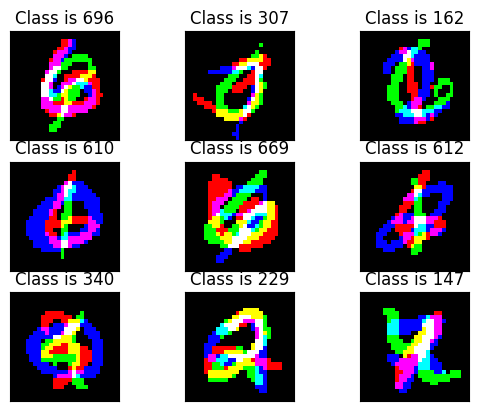

In [9]:
gen = StackedMNISTData(mode=DataMode.COLOR_BINARY_MISSING, default_batch_size=9)
imgTest, clsTest = gen.get_random_batch(batch_size=9)
clsTest = clsTest // 10

img, labels = gen.get_random_batch(training=False, batch_size=batch_size)
labels = labels // 10
print(f"Batch has size: Images: {img.shape}; Labels {labels.shape}")

gen.plot_example(images=imgTest, labels=clsTest)


Reconstructed images


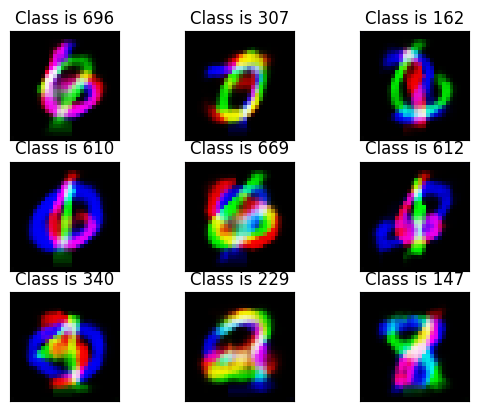

Generated images (ignore the labels)


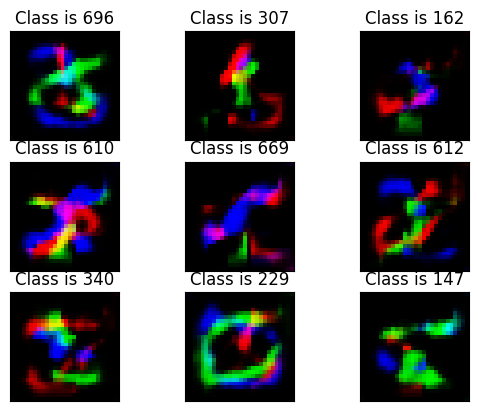

In [10]:
AE = load_model('models/AE_MONO_BINARY_MISSING.keras', custom_objects={'Autoencoder': Autoencoder})

reconstructed_AE_imgs = AE.predictRGB(imgTest)
generated_AE_imgs = AE.generateRGB(num_samples=9)
print("Reconstructed images")
gen.plot_example(images=reconstructed_AE_imgs, labels=clsTest)
print("Generated images (ignore the labels)")
gen.plot_example(images=generated_AE_imgs, labels=clsTest)

img_AE_reconstructed = AE.predictRGB(img)
img_AE_generated = AE.generateRGB(batch_size)


Reconstructed images


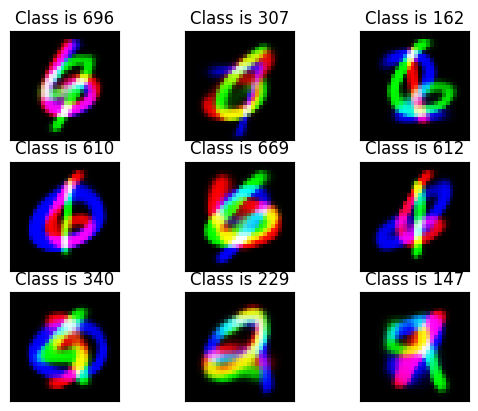

Generated images (ignore the labels)


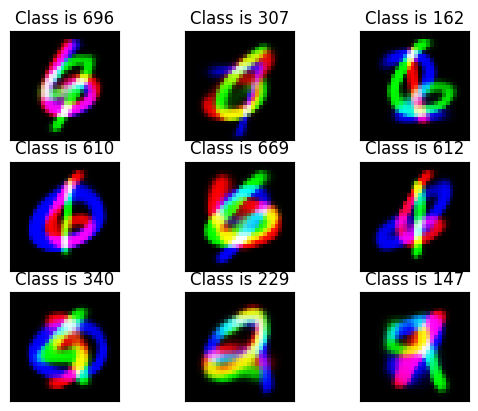

In [11]:
VAE = VariationalAutoencoder()
VAE.load_weights('models/VAE_MONO_BINARY_MISSING.weights.keras')

reconstructed_AE_imgs = VAE.predictRGB(imgTest)
generated_VAE_imgs = VAE.generateRGB(num_samples=9)
print("Reconstructed images")
gen.plot_example(images=reconstructed_AE_imgs, labels=clsTest)
print("Generated images (ignore the labels)")
gen.plot_example(images=reconstructed_AE_imgs, labels=clsTest)

img_VAE_reconstructed = VAE.predictRGB(img)
img_VAE_generated = VAE.generateRGB(batch_size)


In [12]:
net = VerificationNet(file_name = "C:/Projects/public/DL_Autoencoders/models/net_COLOR_BINARY_MISSING.weights.h5")
net.load_weights()

print(f'img.shape: {img.shape}')
print(f'label.shape: {labels.shape}')

cov = net.check_class_coverage(data=img, tolerance=0.98)
pred, acc = net.check_predictability(data=img, correct_labels=labels)
print(f"Original images Coverage: {100*cov:.2f}%")
print(f"Original images Predictability: {100*pred:.2f}%")
print(f"Original images Accuracy: {100 * acc:.2f}%")


cov = net.check_class_coverage(data=img_AE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_AE_reconstructed, correct_labels=labels)
print(f"AE reconstructed Coverage: {100*cov:.2f}%")
print(f"AE reconstructed Predictability: {100*pred:.2f}%")
print(f"AE reconstructed Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_AE_generated, tolerance=0.98)
print(f"AE generated Coverage: {100*cov:.2f}%")

cov = net.check_class_coverage(data=img_VAE_reconstructed, tolerance=0.98)
pred, acc = net.check_predictability(data=img_VAE_reconstructed, correct_labels=labels)
print(f"VAE reconstructed Coverage: {100*cov:.2f}%")
print(f"VAE reconstructed Predictability: {100*pred:.2f}%")
print(f"VAE reconstructed Accuracy: {100 * acc:.2f}%")

cov = net.check_class_coverage(data=img_VAE_generated, tolerance=0.98)
print(f"VAE generated Coverage: {100*cov:.2f}%")

img.shape: (2048, 28, 28, 3)
label.shape: (2048,)
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Original images Coverage: 0.10%
Original images Predictability: 100.00%
Original images Accuracy: 0.05%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
AE reconstructed Coverage: 0.10%
AE reconstructed Predictability: 100.00%
AE reconstructed Accuracy: 0.05%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
AE generated Coverage: 0.10%
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
64/6